In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_book = pd.read_csv('dateset/hotel_bookings.csv', header=0)  
df_book.head()
# df_hr.dtypes  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:

df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
df_book['date_status']

0              July
1              July
2              July
3              July
4              July
            ...    
119385    September
119386    September
119387    September
119388    September
119389    September
Name: date_status, Length: 119390, dtype: object

In [4]:
df_book.groupby('arrival_date_month')['hotel'].count()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: hotel, dtype: int64

In [5]:
# df_book.columns
plt.style.use('fivethirtyeight')

montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
df_motly = pd.DataFrame(montly)
df_motly

,hotel
arrival_date_month,
April,11089
August,13877
December,6780
February,8068
January,5929
July,12661
June,10939
March,9794
May,11791


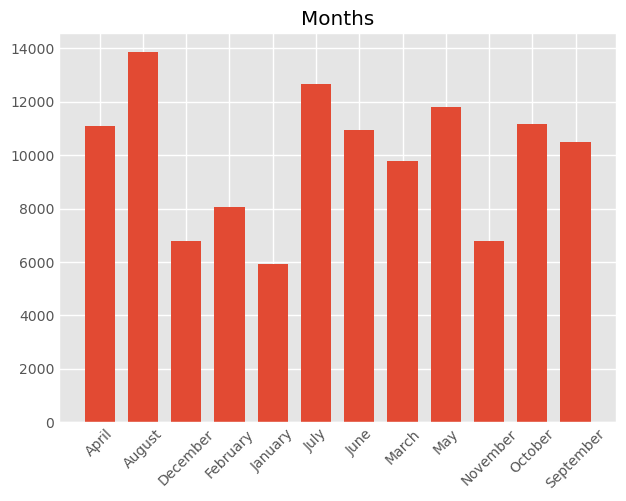

In [6]:
plt.style.use('ggplot')
plt.bar(df_motly.index ,  df_motly['hotel'] , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()
# df_motly.plt(kind='bar' ) 

# df_motly.

,arrival_date_month,hotel
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


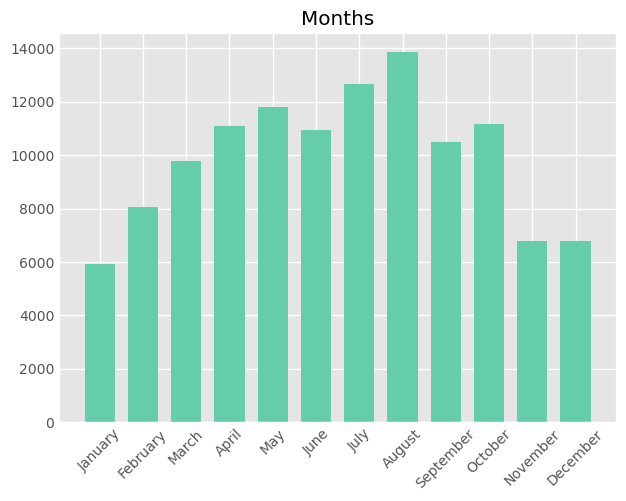

In [13]:
# SINCE IT THE MONTH ARE UNORDER I FIND SOME FUCKING SOLUtioN TO SOLVE THIS ONE

montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# montly = df_book.pivot_table(values= "hotel" , index=None, aggfunc='mean'  )
df_motly = pd.DataFrame(montly) 
df_motly = df_motly.reset_index()  
# display(df_motly)
 
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

tb_ordered = pd.DataFrame([{
    'arrival_date_month' : '', 
    'hotel' : '' 
}])

for order in order_month:
    querys = df_motly.query("arrival_date_month ==  @order " )
    # querys = querys.reset_index()
    tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)
    
    # display(querys) 

# tb_ordered = tb_ordered()
# display(tb_ordered) 
tb_ordered= tb_ordered.query("hotel != ''").reset_index(drop=True)
# tb_ordered = tb_ordered.set_index('arrival_date_month') 
display(tb_ordered) 

greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_ordered['arrival_date_month'] ,  tb_ordered['hotel'] , color=greyn , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()


In [8]:
# montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
df_book

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,September
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,September
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,September
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,September


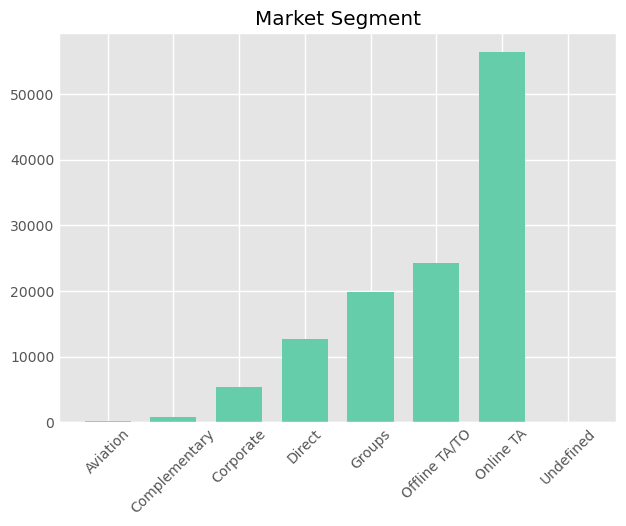

In [9]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_market_seg = df_book.pivot_table(index='market_segment'  , values='hotel' , aggfunc='count') 



greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_market_seg.index ,  tb_market_seg['hotel'] , color=greyn , width=0.7)
plt.title("Market Segment")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()

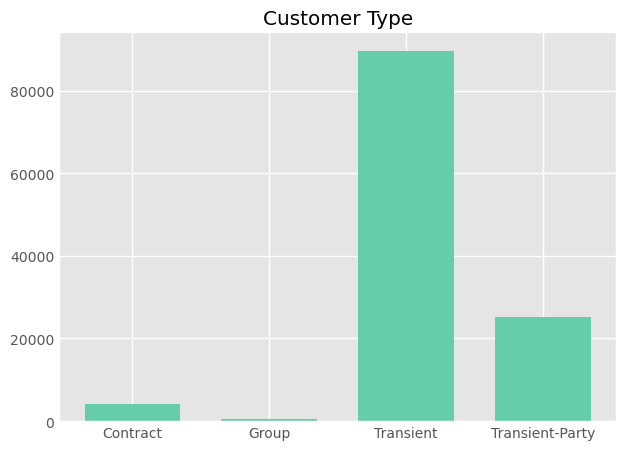

In [10]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_customertype = df_book.pivot_table(index='customer_type'  , values='hotel' , aggfunc='count') 


# tb_customertype
greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_customertype.index,  tb_customertype['hotel'] , color=greyn , width=0.7)
plt.title("Customer Type")
# plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()

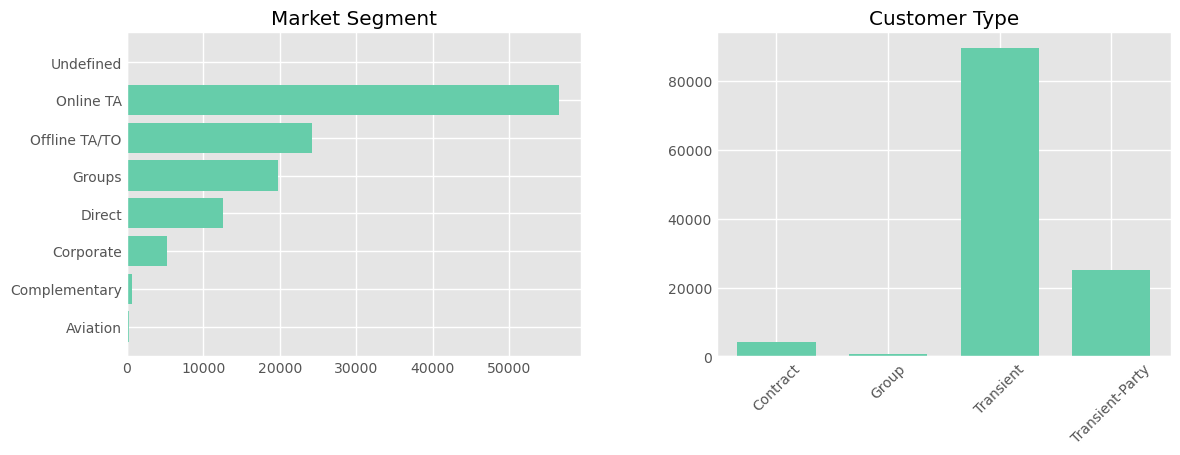

In [11]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3)
# fig, ax = plt.subplots(1 ,2  , figsize =( 8, 3 ) ) 

ax[0].barh(tb_market_seg.index ,  tb_market_seg['hotel'] , color=greyn  ) 
ax[1].bar(tb_customertype.index,  tb_customertype['hotel'] , color=greyn , width=0.7)
ax[0].set_title('Market Segment') 
ax[1].set_title('Customer Type')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show() 

NameError: name 'tb_reservation' is not defined

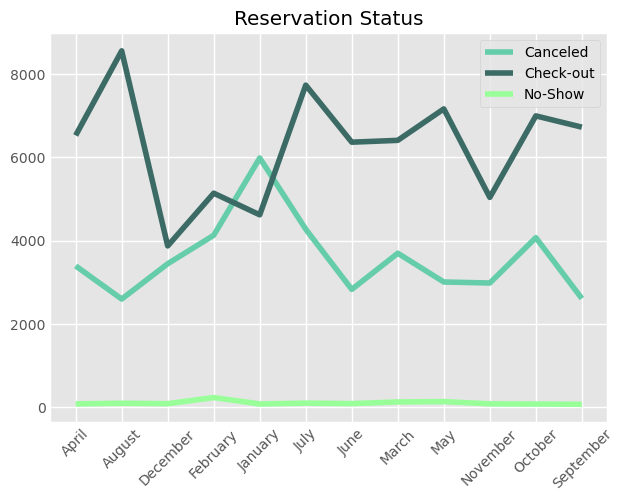

In [50]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_reservation = df_book.pivot_table(index='date_status'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

tb_reservation

greyn_main = '#66cdaa'
greyn_01 = '#3C6B66'
greyn_02 = '#99FF99'
## Vizualising this shit now
plt.style.use('ggplot')
plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn_main  , label='Canceled' )
plt.plot(tb_reservation.index , tb_reservation['Check-Out'] , color=greyn_01  , label='Check-out' )
plt.plot(tb_reservation.index , tb_reservation['No-Show'] , color=greyn_02 , label='No-Show'  )
plt.legend() 
# plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn  )
plt.title("Reservation Status")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show() 

 

In [51]:
# tb_reservation = df_book.pivot_table(index='reservation_status_date'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

# df['date_status'] = pd.to_datetime(df_book['reservation_status_date'] , format='%d-%m/%Y') 
df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
df_book['date_status']
# tb_reservation

0              July
1              July
2              July
3              July
4              July
            ...    
119385    September
119386    September
119387    September
119388    September
119389    September
Name: date_status, Length: 119390, dtype: object

In [49]:
# QUERY RIGHT FILTER TO City Hotel VS Resort Hotel

filter_book_city = df_book[df_book['hotel'] == 'City Hotel' ]
filter_book_resort = df_book[df_book['hotel'] == 'Resort Hotel' ]
# display(filter )

tb_reservation_city = filter_book_city.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count')
tb_reservation_resort = filter_book_resort.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count')


display(tb_reservation_city.head())
display(tb_reservation_resort.head())



reservation_status,Canceled,Check-Out,No-Show
date_status,,,
April,2434,4000,63
August,1846,5293,69
December,2708,2093,45
February,3121,2900,190
January,4671,2530,56


reservation_status,Canceled,Check-Out,No-Show
date_status,,,
April,959,2529,14
August,750,3268,23
December,737,1780,37
February,1008,2240,39
January,1315,2090,19


Text(0.5, 1.0, 'Resort Hotel')

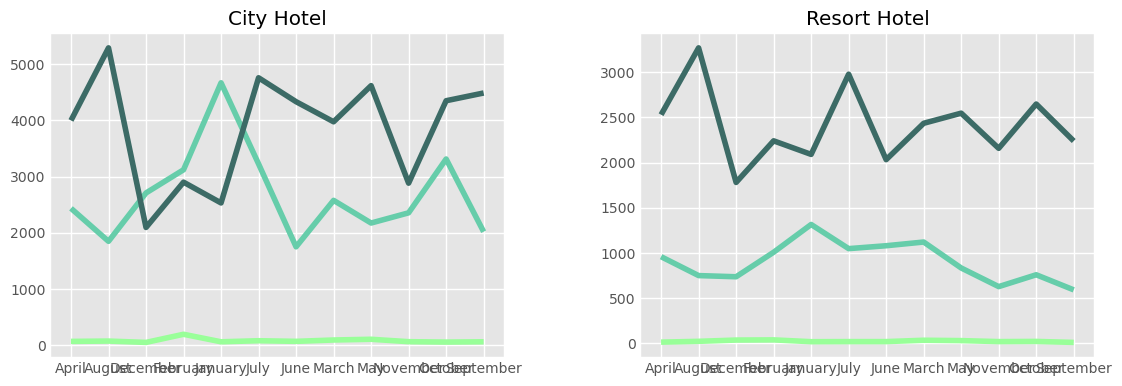

In [56]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 

ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[0].plot(tb_reservation_city.index ,  tb_reservation_city['No-Show'] , color=greyn_02, label='No-Show'  )  
# ax[1].plot(tb_customertype.index,  tb_customertype['hotel'] , color=greyn )
ax[0].set_title('City Hotel') 

ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[1].plot(tb_reservation_resort.index ,  tb_reservation_resort['No-Show'] , color=greyn_02, label='No-Show'  )  
# ax[1].plot(tb_customertype.index,  tb_customertype['hotel'] , color=greyn )
ax[1].set_title('Resort Hotel') 
# ax[1].set_title('Customer Type')



# Stratch with bugs 

In [ ]:
# gagi = tb_ordered[tb_ordered['hotel'] == '']  
# gagi

sampol = tb_ordered.query("arrival_date_month != ''") 
# df_dropp = tb_ordered.drop('March' , axis=0) 
# df_dropp
sampol = sampol.reset_index(drop=True)

# sampol
# tb_ordered


In [ ]:
# months = ['July', 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June']

# Define a function to extract the month's numerical position
# def get_month_index(month):
    # month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#     # print( month_order.index(month))
#     # returnt() 

mon = pd.DataFrame({
    "month" : [ 'July' , 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June' ], 
    "color" : ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Black', 'White', 'Gray', 'Cyan']
})

mon 


# new_Row =  pd.DataFrame([{'month': '' ,  'color' : ''}])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mon = pd.concat([mon , new_Row] , ignore_index=True) 

# mon

init_mon = {"month":  "" , 'color' : ""} 
# init_mon 

new_month = pd.DataFrame([init_mon])
new_month
# for month_or in month_order : 
#     # print(month_or) 
#     if month_or == 



In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 28],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}

df = pd.DataFrame(data)

# Select rows where 'Name' is 'Alice' or 'Bob'
 


# selected_rows = df.loc[ [2] , ['Age']] # Using a list of row labels (index names) 
# print(selected_rows ==  ) 

# order_name = ['Bob' , 'Name' , 'David' ,  'Charlie']
# def orderings(selected): 
#     # print(selected =='Bob')
#     for x in order_name:  
#         # print)a
#         # print(x)
#         if x == selected:
#             print("match")
#         # else : 
        #     print("not exist")


 
 
# for x in range(len(df)): 
#     selected_rows = df.loc[ x , ['Name']]
    
#     # if .any()  :
#         # print('has mtch')
#     # print(selected_rows == '')
#     # display(selected_rows) 
#     # Using a list of row labels (index names) 
#     # if selected_rows == order_name[x] : 
#     #     print('match')
display(df)

# name = 'Bob'


init_name = pd.DataFrame([{
    'Name' : '' , 
    'Age'  :  '' , 
    'City' : ''
}])


display(init_name)

order_name = ['Bob' , 'Alice' , 'David' ,  'Charlie']
for order in order_name :
    filter_df = df.query("Name == @order")
    init_name = pd.concat([init_name , filter_df] , ignore_index=True)
    # display(filter_df)


display(init_name)



